In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn import metrics
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\sankara subramanian\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\sankara subramanian\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\sankara subramanian\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\sankara subramanian\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\sankara subramanian\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
data=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [152]:
data.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [4]:
data['remaining_lease'].fillna('0',inplace=True)

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_6992\1902653644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['remaining_lease'].fillna('0',inplace=True)


In [7]:
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [ ]:
data

In [5]:
data['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [6]:
data['flat_type'] = data['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
data['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [40]:
data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [7]:
data['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [12]:
data['block'].unique()

array(['309', '216', '211', ..., '240A', '460D', '83A'], dtype=object)

In [13]:
year_month=data['month'].str.split('-',expand=True)
year_month

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01
...,...,...
929450,2024,07
929451,2024,07
929452,2024,07
929453,2024,07


In [14]:
data['Year']=year_month[0]
data['Month']=year_month[1]


In [162]:
data['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [15]:
data['block']=data['block'].astype('str')
data['block']=data['block'].apply(lambda x:''.join(char for char in x if char in '0123456789'))
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,1990,01
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,1990,01
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,1990,01
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,1990,01
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,1990,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929450,2024-07,YISHUN,5 ROOM,674,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months,2024,07
929451,2024-07,YISHUN,5 ROOM,342,YISHUN RING RD,13 TO 15,117.0,Premium Apartment,2016,790000.0,90 years 07 months,2024,07
929452,2024-07,YISHUN,5 ROOM,297,YISHUN ST 20,01 TO 03,112.0,Improved,2000,615000.0,75 years 04 months,2024,07
929453,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,830800.0,63 years 04 months,2024,07


In [18]:
data['street_name'].unique()    

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [74]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,1990,01
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,1990,01
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,1990,01
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,1990,01
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,1990,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929450,2024-07,YISHUN,5 ROOM,674,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months,2024,07
929451,2024-07,YISHUN,5 ROOM,342,YISHUN RING RD,13 TO 15,117.0,Premium Apartment,2016,790000.0,90 years 07 months,2024,07
929452,2024-07,YISHUN,5 ROOM,297,YISHUN ST 20,01 TO 03,112.0,Improved,2000,615000.0,75 years 04 months,2024,07
929453,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,830800.0,63 years 04 months,2024,07


          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


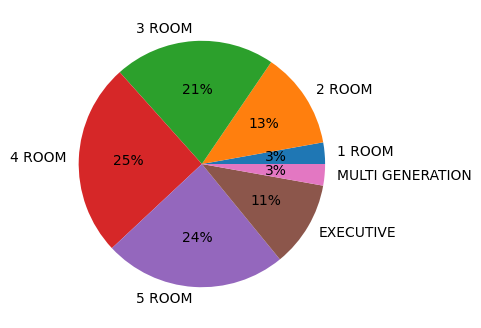

In [19]:
pie=pd.DataFrame(data.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(pie)
plt.figure(figsize=(5,4))
plt.pie(pie['flat_model'],labels=pie['flat_type'], autopct='%.0f%%')
plt.show()

5,4,3 Room shares more in flat model

<Axes: title={'center': 'Floor area distribution of Flat Type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

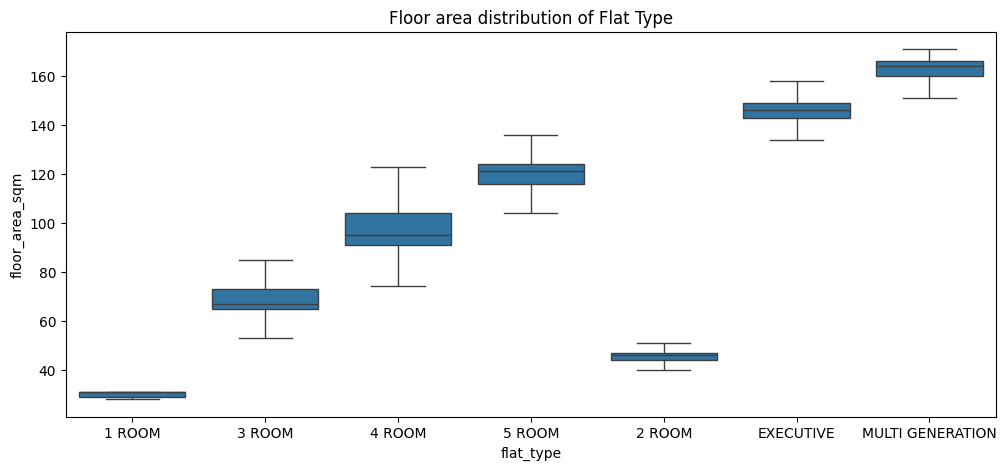

In [20]:
plt.figure(figsize=(12,5))
plt.title('Floor area distribution of Flat Type')
sns.boxplot(x='flat_type', y='floor_area_sqm',data=data,showfliers=False)



In [51]:
data[488441:488442]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
488441,2006-02,WOODLANDS,EXECUTIVE,798,WOODLANDS DR 72,07 TO 09,141.0,Maisonette,1997,362000.0,0,2006,02


In [17]:
data.to_csv('Flat_sing.csv',index=False)

In [22]:
import pickle

# Fit the encoders on the training data
label_encoder_street_name = LabelEncoder()
label_encoder_flat_type = LabelEncoder()
label_encoder_flat_model = LabelEncoder()
label_encoder_town = LabelEncoder()
label_encoder_storey_range = LabelEncoder()

data['street_name'] = label_encoder_street_name.fit_transform(data['street_name'])
data['flat_type'] = label_encoder_flat_type.fit_transform(data['flat_type'])
data['flat_model'] = label_encoder_flat_model.fit_transform(data['flat_model'])
data['town'] = label_encoder_town.fit_transform(data['town'])
data['storey_range'] = label_encoder_storey_range.fit_transform(data['storey_range'])

# Save the encoders
with open('label_encoder_street_name.pkl', 'wb') as file:
    pickle.dump(label_encoder_street_name, file)
with open('label_encoder_flat_type.pkl', 'wb') as file:
    pickle.dump(label_encoder_flat_type, file)
with open('label_encoder_flat_model.pkl', 'wb') as file:
    pickle.dump(label_encoder_flat_model, file)
with open('label_encoder_town.pkl', 'wb') as file:
    pickle.dump(label_encoder_town, file)
with open('label_encoder_storey_range.pkl', 'wb') as file:
    pickle.dump(label_encoder_storey_range, file)



In [23]:
data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,0,0,309,13,5,31.0,7,1977,9000.0,0,1990,01
1,0,0,309,13,2,31.0,7,1977,6000.0,0,1990,01
2,0,0,309,13,5,31.0,7,1977,8000.0,0,1990,01
3,0,0,309,13,4,31.0,7,1977,6000.0,0,1990,01
4,0,2,216,13,2,73.0,20,1976,47200.0,0,1990,01
...,...,...,...,...,...,...,...,...,...,...,...,...
929450,26,4,674,556,0,112.0,9,2018,650000.0,93 years 06 months,2024,07
929451,26,4,342,563,7,117.0,23,2016,790000.0,90 years 07 months,2024,07
929452,26,4,297,565,0,112.0,9,2000,615000.0,75 years 04 months,2024,07
929453,26,5,406,558,2,148.0,15,1988,830800.0,63 years 04 months,2024,07


<Axes: title={'center': 'Correlation Matrix'}>

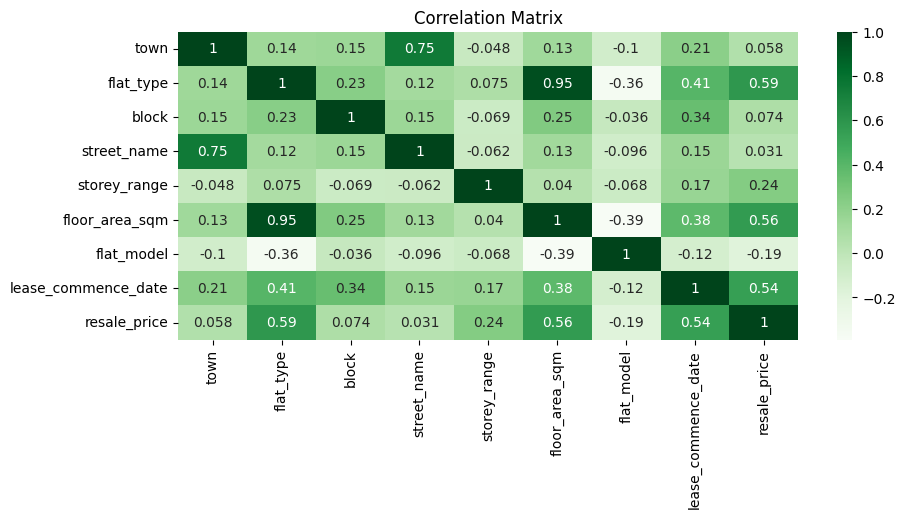

In [24]:
features=['town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','resale_price']
plt.figure(figsize=(10,4))
plt.title('Correlation Matrix')
sns.heatmap(data[features].corr(),cmap='Greens',annot=True)

## Model Selection and Training


In [25]:
#Assigning features and target variables
x=data[['town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','Year','Month']]
y=data['resale_price']

In [26]:
#Splitting the dataset for training and testing
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=20)

## Choosing a suitable model which gives more accuracy

In [27]:

# Training with Linear regression algorithm
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [28]:
#Predicting using feature test data and finding the error
y_pred=lin_reg.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 60558.58009545541
Mean Squared Error: 6626759147.897968
Root Mean Squared Error: 81404.90862287095


In [29]:
#Accuracy %
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

R² score: 0.773626459298851


## Linear regression gave only 77 % accuracy

In [30]:
# Training with DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_Reg=DecisionTreeRegressor()
decision_Reg.fit(X_train,Y_train)
y_pred=decision_Reg.predict(x_test)

In [31]:


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 19818.377340082792
Mean Squared Error: 930187665.5085176
Root Mean Squared Error: 30498.978105971317


In [32]:
# Accuracy %
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

R² score: 0.9682243053266101


# Decision tree regressor gave more Accuracy of 96%

Saving the model for further usage using Pickling technique

In [33]:
import pickle
with open('modelk.pkl','wb') as file:
    pickle.dump(decision_Reg, file)

with open('modelk.pkl','rb') as file:
    model=pickle.load(file)




In [34]:
x_test[:]

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Year,Month
488441,25,5,798,539,4,141.0,15,1997,2006,02
252257,3,3,162,70,0,104.0,12,1985,1999,05
489986,14,4,10,233,2,132.0,9,1986,2006,03
895649,22,2,225,417,2,67.0,21,1985,2023,03
679624,4,2,4,235,0,59.0,29,1971,2013,03
...,...,...,...,...,...,...,...,...,...,...
580020,7,3,53,119,5,77.0,9,1974,2009,07
63967,4,2,16,487,4,65.0,7,1975,1994,03
459962,4,0,7,487,5,31.0,9,1975,2005,03
414447,3,2,360,75,0,68.0,21,1987,2003,09


Testing our model with a value of test data

In [35]:
data[252257:252258]

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
252257,3,3,162,70,0,104.0,12,1985,230000.0,0,1999,05


In [36]:
model.predict(x_test[252257:252258])

array([228000.])